# Titanic data Analysis

Data for this analysis has been sourced from [kaggle](https://www.udacity.com/api/nodes/6833898752/supplemental_media/titanic-datacsv/download).

Description of the data is available [here](https://www.kaggle.com/c/titanic/data).

In brief it is data collected from survivors on Titanic. It includes information such as sex, age, ticket class, name etc.

# Getting to know the data
Read data in to pandas Dataframe and print few rows to understand the data.
Below code enables us to investigate the raw data.

In [183]:
%pylab inline
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
import scipy as sp

def printmd(string):
    display(Markdown(string))


# Read source data in a dataframe

titanic_raw_df = pd.read_csv('titanic_data.csv')

printmd("Rows,Columns")
print titanic_raw_df.shape
print
printmd("Few rows from the top of the source file")
print titanic_raw_df.head()
print
printmd("Info on each column")
print titanic_raw_df.dtypes
print
printmd("More info on each column")
print titanic_raw_df.info()

Populating the interactive namespace from numpy and matplotlib


Rows,Columns

(891, 12)



Few rows from the top of the source file

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  



Info on each column

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object



More info on each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


# Raise questions based on above data
Seems like we have data showing who survived and who did not. We also have their age, ticket class, sex etc.

From this we can find a corelation between survival and age/sex/class.

# Check data further to find any anomalies and cleanup (Data Wrangling)


In [187]:
printmd("Count of each column")
print titanic_raw_df.count()
print 

def unique_values(data,field):
    printmd('Unique values from {} column'.format(field))
    print data[field].unique()
    print "\n"
unique_values(titanic_raw_df,'Survived')
unique_values(titanic_raw_df,'Pclass')
unique_values(titanic_raw_df,'Sex')
unique_values(titanic_raw_df,'SibSp')
unique_values(titanic_raw_df,'Parch')
unique_values(titanic_raw_df,'Cabin')
unique_values(titanic_raw_df,'Embarked')

print
printmd('Common STATS for numeric columns')
print titanic_raw_df.describe()
print
printmd('Data type of Age column')
print titanic_raw_df.Age.dtype

Count of each column

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64



Unique values from Survived column

[0 1]




Unique values from Pclass column

[3 1 2]




Unique values from Sex column

['male' 'female']




Unique values from SibSp column

[1 0 3 4 2 5 8]




Unique values from Parch column

[0 1 2 5 3 4 6]




Unique values from Cabin column

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49' 'F4'
 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77' 'E67'
 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106' 'C65'
 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91' 'E40'
 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34' 'C104'
 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79' 'E25'
 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68' 'A10'
 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58' 'C126'
 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90' 'C45'
 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6' 'B82 B84'
 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50' 'B42' 'C148']




Unique values from Embarked column

['S' 'C' 'Q' nan]





Common STATS for numeric columns

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000         NaN    0.000000   
50%     446.000000    0.000000    3.000000         NaN    0.000000   
75%     668.500000    1.000000    3.000000         NaN    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  



Data type of Age column

float64


Count of columns above show that Age value is available only for 714 passengers out of 891 so if analysing based on Age it would be best to only use those 714 records for analysis.
Same applies to other variables that dont have values for all passengers such as Embarked column.

In [231]:
# Check rows where the Emarked field is null

print titanic_raw_df[titanic_raw_df['Embarked'].isnull()]

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


Common STATS for dataset restricted to passengers who have age value

       PassengerId    Survived      Pclass         Age       SibSp  \
count   714.000000  714.000000  714.000000  714.000000  714.000000   
mean    448.582633    0.406162    2.236695   29.699118    0.512605   
std     259.119524    0.491460    0.838250   14.526497    0.929783   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     222.250000    0.000000    1.000000   20.125000    0.000000   
50%     445.000000    0.000000    2.000000   28.000000    0.000000   
75%     677.750000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    5.000000   

            Parch        Fare  
count  714.000000  714.000000  
mean     0.431373   34.694514  
std      0.853289   52.918930  
min      0.000000    0.000000  
25%      0.000000    8.050000  
50%      0.000000   15.741700  
75%      1.000000   33.375000  
max      6.000000  512.329200  



Check Age_Class column

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Age_Class  
0      0         A/5 21171   7.2500   NaN        S     21-30  
1      0          PC 17599  71.2833   C85        C     31-40  
2      0  STON/O2. 3101282   7.9250   NaN        S     21-30  
3      0            113803  53.1000  C123        S     31-40  
4    

Count by Age_class

21-30    230
31-40    155
11-20    115
41-50     86
0-10      64
51-60     42
61-70     17
71-80      5
Name: Age_Class, dtype: int64



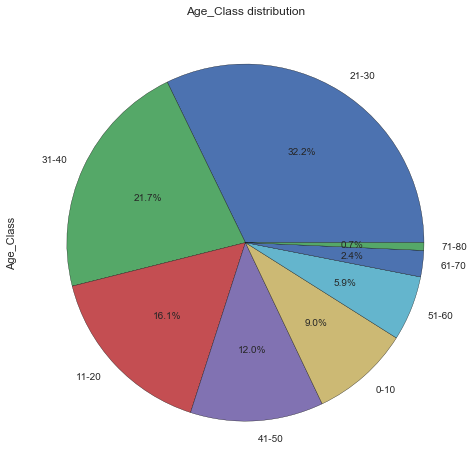

In [236]:
# Creating another dataframe with records that have a valid age

titanic_with_age_df = titanic_raw_df[titanic_raw_df.Age.notnull()]
printmd('Common STATS for dataset restricted to passengers who have age value')
print titanic_with_age_df.describe()
#age_survival_group = titanic_with_age_df.groupby('Survived', as_index=False)


#titanic_with_age_df['Age_Class'] = titanic_with_age_df['Age']
titanic_with_age_df.loc[:,'Age_Class'] = titanic_with_age_df['Age']
def age_class(x):
    if x >= 0 and x <= 10:
        return '0-10'
    elif x > 10 and x <= 20:
        return '11-20'
    elif x > 20 and x <= 30:
        return '21-30'
    elif x > 30 and x <= 40:
        return '31-40'
    elif x > 40 and x <= 50:
        return '41-50'
    elif x > 50 and x <= 60:
        return '51-60'
    elif x > 60 and x <= 70:
        return '61-70'
    elif x > 70 and x <= 80:
        return '71-80'
    else:
        return '>80'

titanic_with_age_df.loc[:,'Age_Class'] = titanic_with_age_df['Age_Class'].apply(age_class)

print
printmd('Check Age_Class column')
print titanic_with_age_df.head()
print
printmd('Count by Age_class')
print titanic_with_age_df.Age_Class.value_counts()
print

# The parameters for pie chart
fig = plt.figure(figsize=(8,8), dpi=1600) 
titanic_with_age_df.Age_Class.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Age_Class distribution')

STATS from dead and alive dataframe created above

14.1721098771

PassengerId    250.845515
Survived         0.000000
Pclass           0.836617
Age             14.950952
SibSp            0.731132
Parch            0.807147
Fare            70.458776
dtype: float64


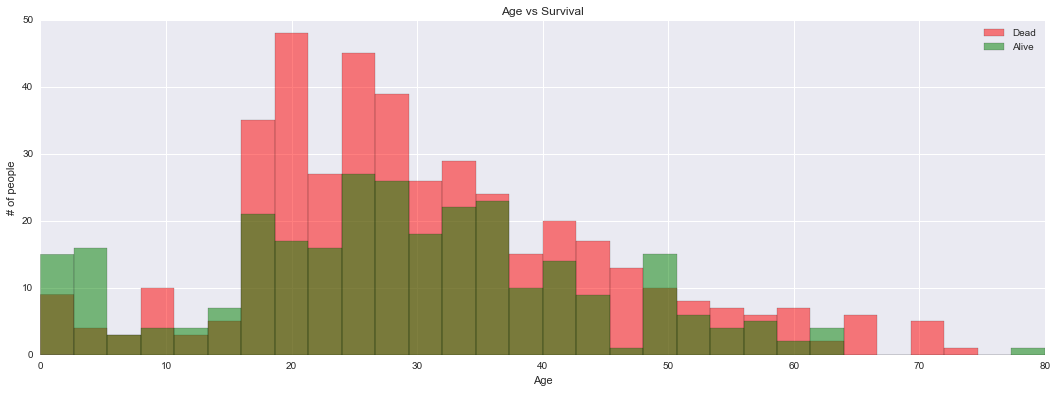

In [239]:
# prepare data for Age vs survival graph
dead = titanic_with_age_df[titanic_with_age_df['Survived'] == 0]
alive = titanic_with_age_df[titanic_with_age_df['Survived'] == 1]

printmd('STATS from dead and alive dataframe created above')
print dead['Age'].std()
print
print alive.std()

# Graph parameters for Age vs Survival
plt.figure(figsize=(18,6), dpi=1600)
dead['Age'].hist(bins=30,color='r',label='Dead',alpha=0.5,range=(0,80))
alive['Age'].hist(bins=30,color='g',label='Alive',alpha=0.5,range=(0,80))
plt.legend()
plt.title('Age vs Survival')
plt.xlabel('Age')
plt.ylabel('# of people')
plt.show()


Count of passengers grouped by Survival and Sex

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64



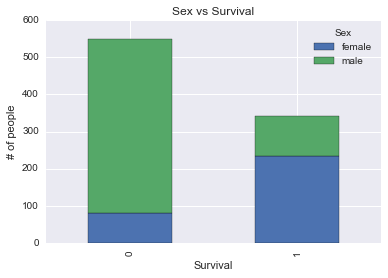

In [214]:
# Group passengers by survived and sex columns
sex_group = titanic_raw_df.groupby(['Survived','Sex'])
printmd('Count of passengers grouped by Survival and Sex')
print sex_group['PassengerId'].count()
print

# Create stacked bar graph showing survival vs sex
sex_group['PassengerId'].count().unstack().plot.bar(stacked=True)
plt.figure
plt.title('Sex vs Survival')
plt.xlabel('Survival')
plt.ylabel('# of people')
plt.show()

# Finding
Above graph shows that more females survived compared to men.

What is even more interesting in this analysis is that ~ only 34% of total passengers were Females.

Approx 74% of the female passengers survived while approx 18.8% of the male passengers survived.

0-10      26
11-20     71
21-30    146
31-40     86
41-50     53
51-60     25
61-70     13
71-80      4
Name: Age_Class, dtype: int64


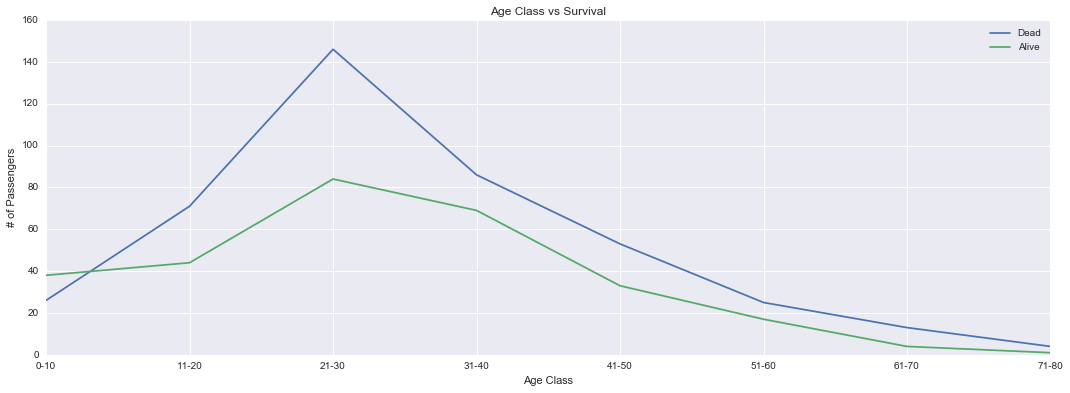

In [217]:

fig = plt.figure(figsize=(18,6), dpi=1600)
print dead.Age_Class.value_counts().sort_index()
dead.Age_Class.value_counts().sort_index().plot(label='Dead')
alive.Age_Class.value_counts().sort_index().plot(label='Alive')
plt.legend()
plt.title('Age Class vs Survival')
plt.xlabel('Age Class')
plt.ylabel('# of Passengers')

# Finding
One interesting finding looking at the above graph is that in almost all age groups the people who died or more compared to who survived except for the 0-10 age group.

Another interesting finding is that the gap between alive and dead numbers is highest in the age group 20-30.

Ticket class and corresponding count of passengers

1    216
2    184
3    491
Name: Pclass, dtype: int64

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: PassengerId, dtype: int64

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


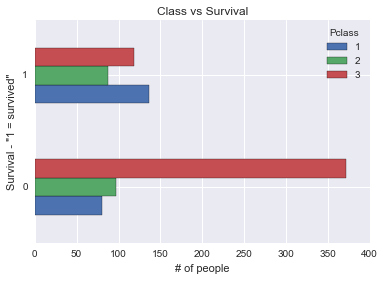

In [230]:
# Count of passengers in each ticket class
printmd('Ticket class and corresponding count of passengers')
print titanic_raw_df.Pclass.value_counts().sort_index()
print
class_survival_group = titanic_raw_df.groupby(['Survived','Pclass'])
print class_survival_group['PassengerId'].count()
print
print class_survival_group['PassengerId'].count().unstack()
class_survival_group['PassengerId'].count().unstack().plot.barh(stacked=False)
plt.figure
#plt.legend('1 = survived')
plt.title('Class vs Survival')
plt.xlabel('# of people')
plt.ylabel('Survival - "1 = survived"')
plt.show()


# Finding
One interesting finding from the above graph is that of the first class passengers 62% of them survived while about 47% of the second class passengers survived and only 28% of the third class passengers survived.

# Conclusion
Best chances of survival were for first class passengers, females and for kids under 10.

and Life has always been unfair to the poor.